&emsp;&emsp;比特币市场作为全球首个且最知名的加密货币市场，以其高度的波动性、全球化的交易网络以及去中心化的特性而著称。自2009年比特币诞生以来，在市场情绪、政策变化、技术进步等多重因素共同作用下，它经历了频繁的大幅价格波动，这些波动不仅体现了投资者对比特币价值的认知变化，同时也映射出全球经济环境和技术发展的脉络。这种“疯狂”的市场行为提供了一个极佳的实验场，可以帮助我们更深入地理解金融市场中的风险管理和投资策略。

|字段|说明|
|----|----|
|Date|交易日期|
|Open (Open Price per unit)|开盘价|
|High (Highest Price per unit)|最高价|
|Low (Lowest Price per unit)|最低价|
|Close|收盘价|
|Adj Close|调整后收盘价，考虑了股息等因素|
|Volume|成交量|

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option("display.float_format", "{:,.4f}".format) # 禁用科学计数法，所有都保留两位小数

# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore')

In [206]:
btc_data = pd.read_csv("G:\data\Bitcoin & Ethereum prices (2014-2025)\BTC-USD (2014-2024).csv")
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.8600,456.8600,413.1040,424.4400,424.4400,"34,483,200.0000"
1,2014-09-19,424.1030,427.8350,384.5320,394.7960,394.7960,"37,919,700.0000"
2,2014-09-20,394.6730,423.2960,389.8830,408.9040,408.9040,"36,863,600.0000"
3,2014-09-21,408.0850,412.4260,393.1810,398.8210,398.8210,"26,580,100.0000"
4,2014-09-22,399.1000,406.9160,397.1300,402.1520,402.1520,"24,127,600.0000"


In [207]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3413 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.8+ KB


In [208]:
# 发现存在缺失值
btc_data.isnull().sum() # 纵向相加

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [209]:
btc_data.isnull().any(axis=1) # 每一行是否存在缺失值

0       False
1       False
2       False
3       False
4       False
        ...  
3408    False
3409    False
3410    False
3411     True
3412    False
Length: 3413, dtype: bool

In [210]:
# btc_data[btc_data['Open'].isnull()] 
btc_data[btc_data.isnull().any(axis=1)] # 2024年1月20日的数据缺失
# .any(axis=1)：检查每一行是否有任意一列为NaN

,Date,Open,High,Low,Close,Adj Close,Volume
3411,2024-01-20,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data['Date'] = btc_data['Date'].dt.strftime('%Y%m%d')
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20140918,456.8600,456.8600,413.1040,424.4400,424.4400,"34,483,200.0000"
1,20140919,424.1030,427.8350,384.5320,394.7960,394.7960,"37,919,700.0000"
2,20140920,394.6730,423.2960,389.8830,408.9040,408.9040,"36,863,600.0000"
3,20140921,408.0850,412.4260,393.1810,398.8210,398.8210,"26,580,100.0000"
4,20140922,399.1000,406.9160,397.1300,402.1520,402.1520,"24,127,600.0000"


In [212]:
np.nan == np.nan

False

In [213]:
btc_data[btc_data['Close'] != btc_data['Adj Close']]  # 发现所有两列价格其实都一样

,Date,Open,High,Low,Close,Adj Close,Volume
3411,20240120,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
btc_data = btc_data.drop('Close', axis=1)  # 删除Close列

In [215]:
btc_data.dropna(axis=0, inplace=True)
btc_data.reset_index(inplace=True, drop=True)
btc_data.head()

,Date,Open,High,Low,Adj Close,Volume
0,20140918,456.8600,456.8600,413.1040,424.4400,"34,483,200.0000"
1,20140919,424.1030,427.8350,384.5320,394.7960,"37,919,700.0000"
2,20140920,394.6730,423.2960,389.8830,408.9040,"36,863,600.0000"
3,20140921,408.0850,412.4260,393.1810,398.8210,"26,580,100.0000"
4,20140922,399.1000,406.9160,397.1300,402.1520,"24,127,600.0000"


In [216]:
btc_data = btc_data[['Date','Open', 'Adj Close', 'High', 'Low', 'Volume']]
btc_data.columns = ['Date','Open', 'Close', 'High', 'Low', 'Volume']

In [217]:
btc_data.describe()   # btc_data.describe().T
# 可以观察到最低价和最高价相差很大，且最高价相对于均值来说相差也很大

,Open,Close,High,Low,Volume
count,"3,412.0000","3,412.0000","3,412.0000","3,412.0000","3,412.0000"
mean,"14,747.3604","14,758.1120","15,091.8091","14,376.1264","16,630,263,682.9226"
std,"16,293.6337","16,295.3741","16,683.9482","15,855.9013","19,076,072,713.6998"
min,176.8970,178.1030,211.7310,171.5100,"5,914,570.0000"
25%,921.7900,921.7393,935.2103,908.8765,"168,553,000.0000"
50%,"8,288.8198","8,285.4390","8,464.7207","8,108.0115","11,760,040,674.5000"
75%,"24,345.8315","24,382.6753","24,986.3003","23,907.7246","26,976,482,013.5000"
max,"67,549.7344","67,566.8281","68,789.6250","66,382.0625","350,967,941,479.0000"


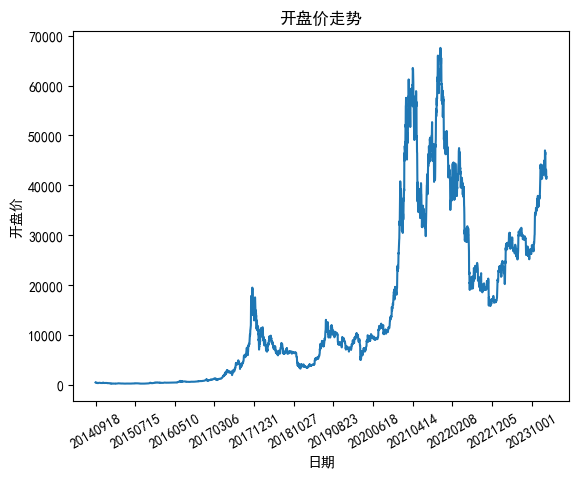

In [218]:
# 开盘价走势图
sns.lineplot(data=btc_data, x='Date', y='Open')
plt.xlabel("日期")
plt.ylabel("开盘价")
plt.title("开盘价走势")
# plt.legend()
# plt.xlim(), plt.ylim()
xticks = btc_data['Date'].unique()[::300]
plt.xticks(xticks, rotation=30);    # 加分号抑制输出

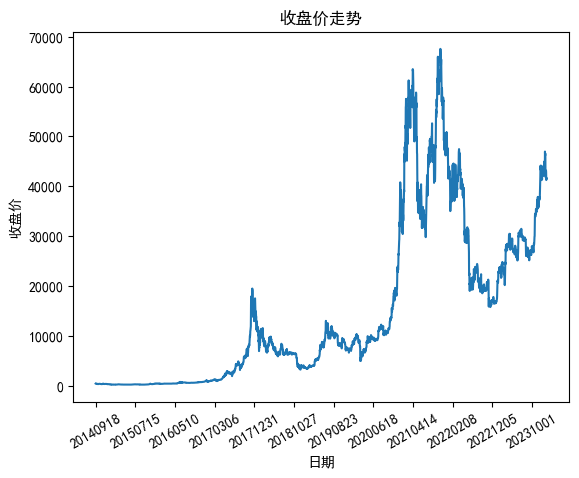

In [219]:
# 收盘价走势图
sns.lineplot(data=btc_data, x='Date', y='Close')
plt.xlabel("日期")
plt.ylabel("收盘价")
plt.title("收盘价走势")
# plt.legend()
# plt.xlim(), plt.ylim()
xticks = btc_data['Date'].unique()[::300]
plt.xticks(xticks, rotation=30);    # 加分号抑制输出

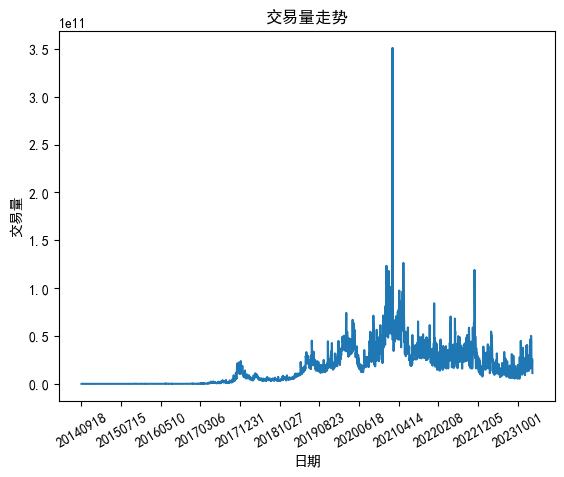

In [220]:
# 交易量走势图
sns.lineplot(data=btc_data, x='Date', y='Volume')
plt.xlabel("日期")
plt.ylabel("交易量")
plt.title("交易量走势")
# plt.legend()
# plt.xlim(), plt.ylim()
xticks = btc_data['Date'].unique()[::300]
plt.xticks(xticks, rotation=30);    # 加分号抑制输出

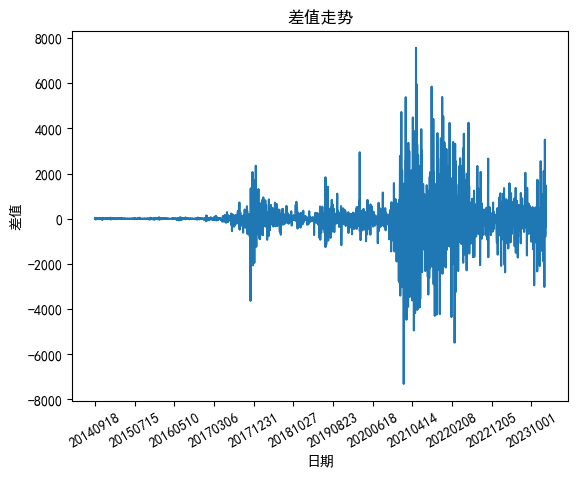

In [221]:
# 开盘与收盘差值走势图
btc_data['Diff'] = btc_data['Open'] - btc_data['Close']
sns.lineplot(data=btc_data, x='Date', y='Diff')
plt.xlabel("日期")
plt.ylabel("差值")
plt.title("差值走势")
# plt.legend()
# plt.xlim(), plt.ylim()
xticks = btc_data['Date'].unique()[::300]
plt.xticks(xticks, rotation=30);    # 加分号抑制输出

一些常用的量化回测指标

In [222]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

In [266]:
btc_data_quantum = btc_data.copy()
btc_data_quantum.head()

,Open,Close,High,Low,Volume,Diff
Date,,,,,,
2014-09-18,456.8600,424.4400,456.8600,413.1040,"34,483,200.0000",32.4200
2014-09-19,424.1030,394.7960,427.8350,384.5320,"37,919,700.0000",29.3070
2014-09-20,394.6730,408.9040,423.2960,389.8830,"36,863,600.0000",-14.2310
2014-09-21,408.0850,398.8210,412.4260,393.1810,"26,580,100.0000",9.2640
2014-09-22,399.1000,402.1520,406.9160,397.1300,"24,127,600.0000",-3.0520


In [267]:
# 查看一周、一月、一季度的均线
btc_data_quantum['MA5'] = btc_data_quantum['Close'].rolling(window=5).mean();
btc_data_quantum['MA20'] = btc_data_quantum['Close'].rolling(window=20).mean();
btc_data_quantum['MA60'] = btc_data_quantum['Close'].rolling(window=60).mean();
btc_data_quantum.dropna(inplace=True)


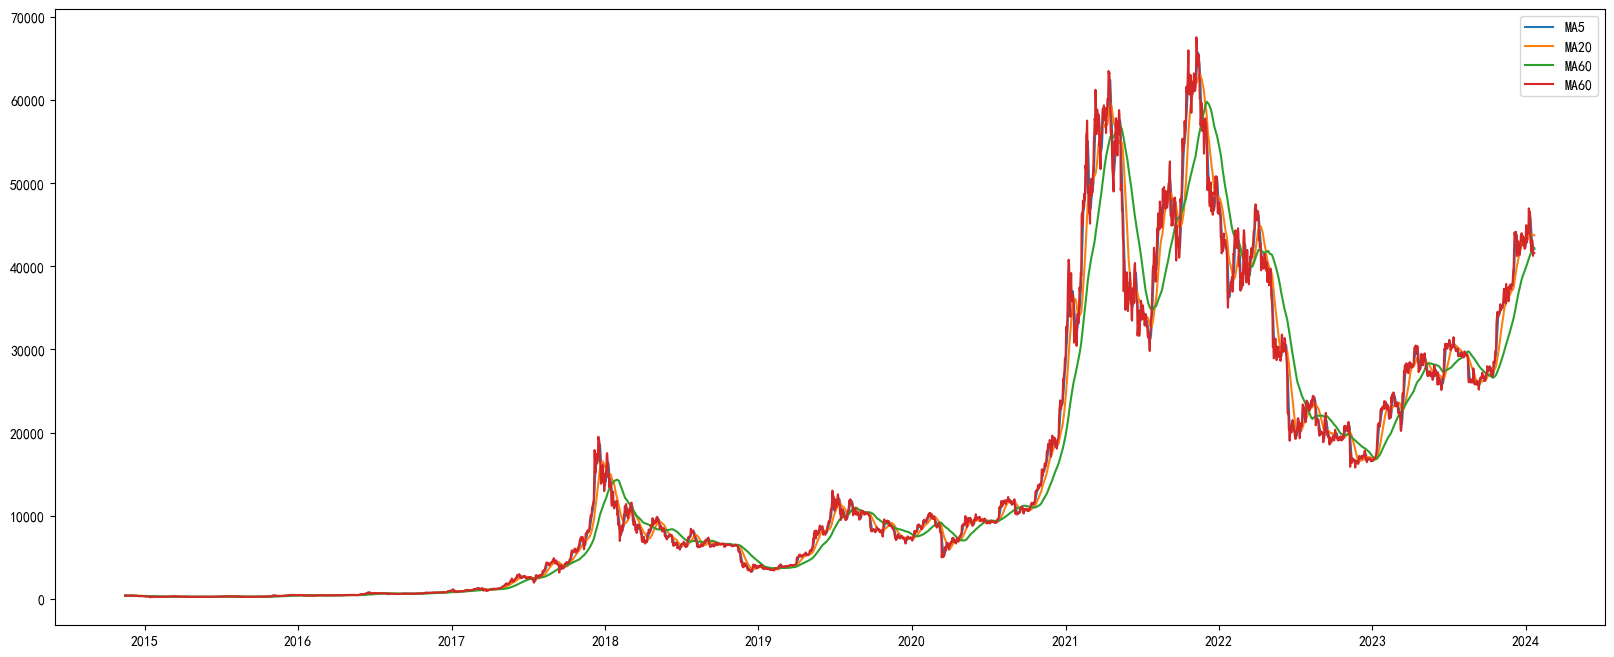

In [268]:
plt.figure(figsize=(20, 8));
plt.plot(btc_data_quantum.index, btc_data_quantum['MA5'], label='MA5')
plt.plot(btc_data_quantum.index, btc_data_quantum['MA20'], label='MA20')
plt.plot(btc_data_quantum.index, btc_data_quantum['MA60'], label='MA60')
plt.plot(btc_data_quantum.index, btc_data_quantum['Close'], label='MA60')
plt.legend()
plt.show()

In [269]:
# 生成交易信号，当5日均线超过20日均线时买入，否则卖出
btc_data_quantum['signal'] = np.where(btc_data_quantum['MA5']>btc_data_quantum['MA20'], 1, -1)

# 计算当天持仓状态
btc_data_quantum['position'] = btc_data_quantum['signal'].shift(1)

# 计算每日涨跌幅
btc_data_quantum['return'] = btc_data_quantum['Close'].pct_change()

'''
1. 当日收益是前一天的signal*当日的return得到，但是需要考虑，是T1收盘后计算signal，从而计算第二次的仓位（多or空），如果T2次开盘的时候建仓，那么当天的return应该等于(Close-Open)/Open，但是这样到之后的某一天，开盘空头，此时的收益就等于Open之间的，而非Close
2. 在前一天收盘前生成signal并下单
3. 前一天收盘后，得出signal，第二天收盘时下单，第三天得到收益
signal连续为1或者为-1的时候，需要从空头转换为多头，需要双倍手续费
''';

In [270]:
# 采用T1时收盘计算MA，然后立刻下单，以收盘价成交（是否有未来函数风险？）
btc_data_quantum['strategy_return'] = btc_data_quantum['signal'] * btc_data_quantum['return']

# 计算换仓时的手续费，signal从-1到1，或者从1到-1
btc_data_quantum['signal_change'] = btc_data_quantum['signal'].diff().abs() # 只要是2，就说明换仓
fee_rate = 0.0003  # 单边0.03
btc_data_quantum['fee_cost'] = np.where(btc_data_quantum['signal_change'] == 2, 2*fee_rate, 0)

In [271]:
btc_data_quantum.dropna(inplace=True)
btc_data_quantum['strategy_return_net'] = btc_data_quantum['strategy_return'] - btc_data_quantum['fee_cost']
btc_data_quantum['cumulative_return'] = (1+btc_data_quantum['strategy_return_net']).cumprod()

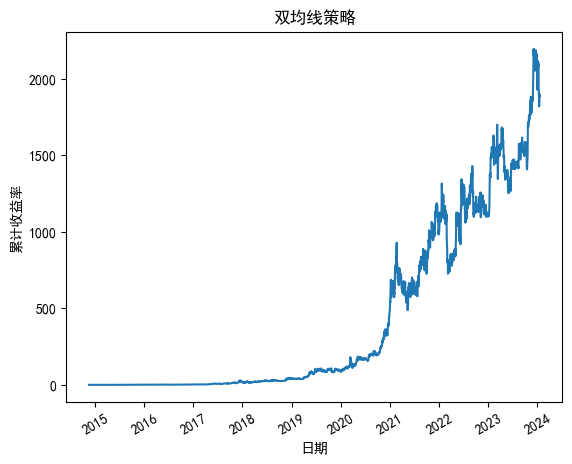

In [272]:
plt.plot(btc_data_quantum.index, btc_data_quantum['cumulative_return'])
plt.xlabel("日期")
plt.ylabel("累计收益率")
plt.title("双均线策略")
plt.xticks(rotation=30)
plt.show()

计算净值曲线

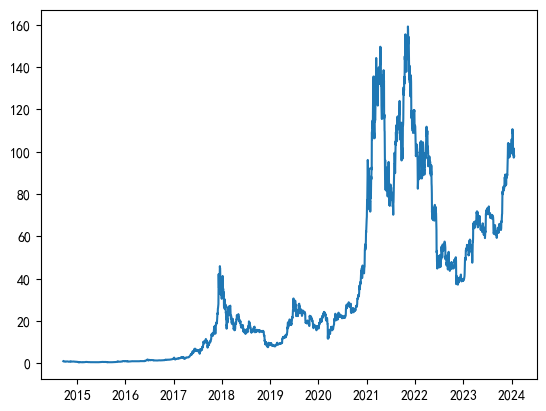

In [273]:
plt.plot(btc_data.index, btc_data['Close']/btc_data['Close'][0])

In [274]:
# 累积收益率
(btc_data['Close'][-1] - btc_data['Close'][0]) / btc_data['Close'][0]

97.06732427873278

In [ ]:
(btc_data.index[-1] - btc_data.index[0]).days # 一共的天数

3412

$(1+anuual\hspace{3pt}return)^\frac{N}{252}=1+R_{total}$

In [277]:
# 年化收益率
((btc_data['Close'][-1] - btc_data['Close'][0]) / btc_data['Close'][0]) ** (252/1826) - 1  # 1826为交易日

0.8803086353742318

$Annualized\hspace{3pt}return=\sigma_{daily}\times\sqrt{252}$

In [278]:
# 收益率波动率
daily_volatility = btc_data['Close'].pct_change().dropna().std()
annualized_volatility = daily_volatility * (252 ** 0.5)
daily_volatility

0.03693330461539302

In [ ]:
# 最大回撤

cumulative_return = pd.DataFrame((btc_data['Close'].pct_change().dropna() + 1).cumprod())

# pd.DataFrame(Series, columns=['...'])，仅用于二维数据，想指定列名，可以：列名:{Series}

cumulative_return.columns = ['cumulative_return']

In [306]:
cumulative_return['cum_max'] = cumulative_return['cumulative_return'].cummax()
cumulative_return['drawdown'] = cumulative_return['cumulative_return'] / cumulative_return['cum_max'] - 1
max_drawdown = -cumulative_return['drawdown'].min()
print(f"最大回撤为{max_drawdown:.4f}")

最大回撤为0.8340


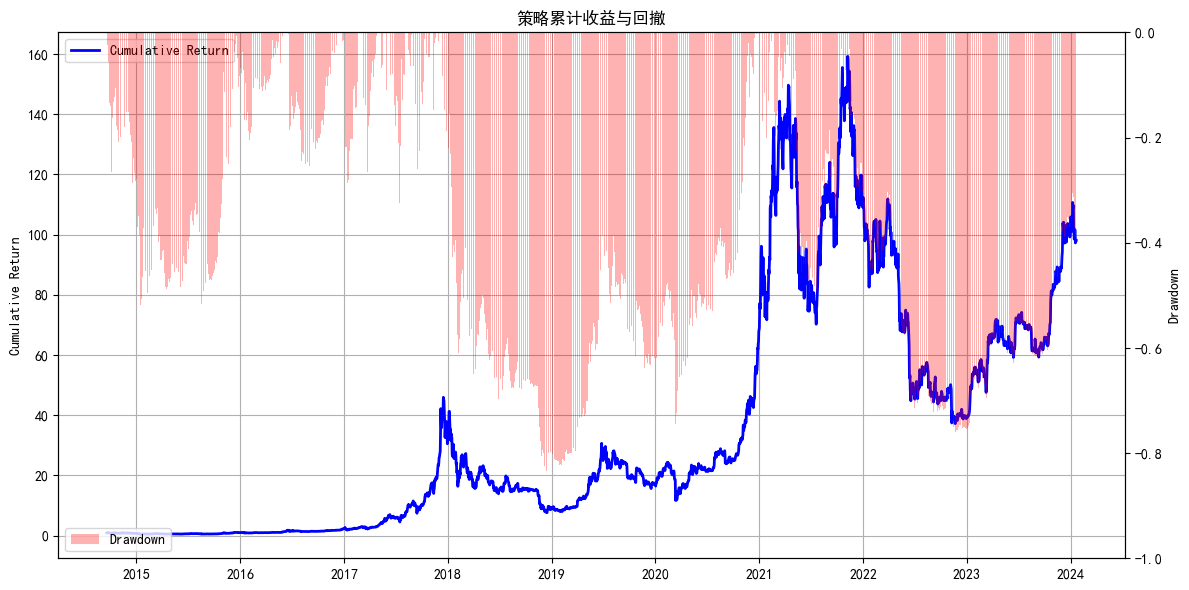

In [318]:
fig, ax1 = plt.subplots(figsize=(12,6))

# 1️⃣ 累计收益线（主轴）
ax1.plot(cumulative_return.index, cumulative_return['cumulative_return'], color='b', label='Cumulative Return', linewidth=2)
ax1.set_ylabel('Cumulative Return')
ax1.legend(loc='upper left')
ax1.grid(True)

# 2️⃣ 回撤柱状图（次轴）
ax2 = ax1.twinx()
ax2.bar(cumulative_return.index, cumulative_return['drawdown'], color='r', alpha=0.3, label='Drawdown')
ax2.set_ylabel('Drawdown')
ax2.set_ylim(-1, 0)  # 限制回撤在下方显示
ax2.legend(loc='lower left')

plt.title("策略累计收益与回撤")
plt.tight_layout()
plt.show()

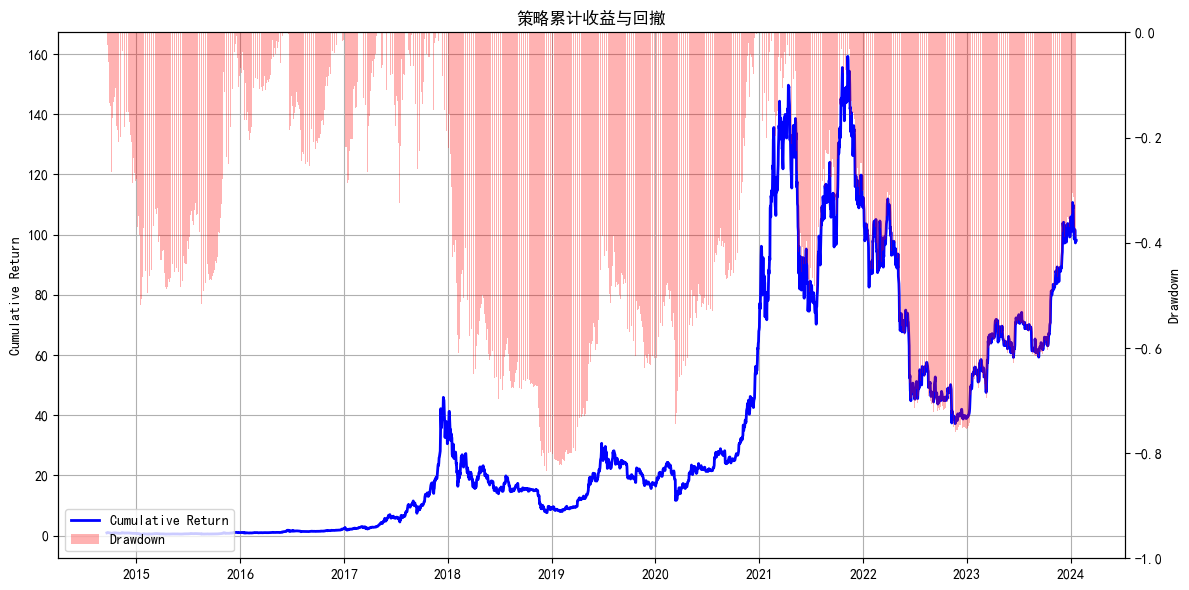

In [319]:
# 自定义颜色
line_color = 'blue'
bar_color = 'red'

# 绘图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 折线图：累计收益
line_plot, = ax1.plot(cumulative_return.index, cumulative_return['cumulative_return'], color=line_color, label='Cumulative Return', linewidth=2)
ax1.set_ylabel('Cumulative Return')
ax1.grid(True)

# 柱状图：Drawdown
ax2 = ax1.twinx()
bar_plot = ax2.bar(cumulative_return.index, cumulative_return['drawdown'], color=bar_color, alpha=0.3, label='Drawdown')
ax2.set_ylabel('Drawdown')
ax2.set_ylim(-1, 0)  # 限制回撤显示在图下方

# ✅ 合并两个图的图例到左下角
lines = [line_plot]
labels = [line_plot.get_label()]
# 注意 bar_plot 是一个 BarContainer，取 legend handle 需要加 [0]
lines.append(bar_plot[0])
labels.append('Drawdown')

ax1.legend(lines, labels, loc='lower left')

plt.title("策略累计收益与回撤")
plt.tight_layout()
plt.show()


In [317]:
# 夏普比率，基准为年化无风险利率3%
ex_return = btc_data['Close'].pct_change().dropna() - 0.03/252

sharpe_ratio = ex_return.mean() / ex_return.std() * (252 ** 0.5)
sharpe_ratio

0.8227663826085544